# LAB 05.02 - Model evaluation

In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/fagonzalezo/ai4eng-unal/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()


replicating local resources


In [ ]:
from local.lib.rlxmoocapi import submit, session
session.LoginSequence(endpoint=init.endpoint, course_id=init.course_id, lab_id="L05.02", varname="student");

MessageError: Error: credential propagation was unsuccessful

## Task 1: Partition randomly `numpy` arrays

observe we can select specific rows and/or columns on a numpy array

In [ ]:
import numpy as np

x = np.random.randint(100, size=(20,5))
x[:,0] = range(len(x))
x[0,:] = range(x.shape[1])
x

array([[ 0,  1,  2,  3,  4],
       [ 1, 15, 59,  7, 37],
       [ 2, 62, 45, 35,  0],
       [ 3, 17, 16, 10, 15],
       [ 4, 88, 88, 53, 55],
       [ 5, 49, 78, 91, 46],
       [ 6, 14, 24, 31, 68],
       [ 7, 37, 79, 43, 70],
       [ 8, 72, 26, 20,  4],
       [ 9, 14, 41, 33, 74],
       [10, 65,  4, 55, 90],
       [11, 47, 94, 98, 28],
       [12, 35, 38, 97, 71],
       [13, 53, 48, 42, 89],
       [14, 63, 91, 25, 57],
       [15, 27, 12, 13, 38],
       [16, 66, 69, 96,  8],
       [17, 66, 14,  7, 30],
       [18, 88, 52, 71, 19],
       [19, 39, 16, 38, 64]])

In [ ]:
ridxs = np.r_[2,4,5]
x[ridxs]

array([[ 2, 62, 45, 35,  0],
       [ 4, 88, 88, 53, 55],
       [ 5, 49, 78, 91, 46]])

In [ ]:
cidxs = np.r_[1,3]
x[:,cidxs]

array([[ 1,  3],
       [15,  7],
       [62, 35],
       [17, 10],
       [88, 53],
       [49, 91],
       [14, 31],
       [37, 43],
       [72, 20],
       [14, 33],
       [65, 55],
       [47, 98],
       [35, 97],
       [53, 42],
       [63, 25],
       [27, 13],
       [66, 96],
       [66,  7],
       [88, 71],
       [39, 38]])

In [ ]:
x[ridxs][:, cidxs]

array([[62, 35],
       [88, 53],
       [49, 91]])

and the dimensions of the array are accessible through `len` and `shape`

In [ ]:
len(x), x.shape

(20, (20, 5))

observe also how we can partition it

In [ ]:
x[:3]

array([[ 0,  1,  2,  3,  4],
       [ 1, 15, 59,  7, 37],
       [ 2, 62, 45, 35,  0]])

In [ ]:
x[3:]

array([[ 3, 17, 16, 10, 15],
       [ 4, 88, 88, 53, 55],
       [ 5, 49, 78, 91, 46],
       [ 6, 14, 24, 31, 68],
       [ 7, 37, 79, 43, 70],
       [ 8, 72, 26, 20,  4],
       [ 9, 14, 41, 33, 74],
       [10, 65,  4, 55, 90],
       [11, 47, 94, 98, 28],
       [12, 35, 38, 97, 71],
       [13, 53, 48, 42, 89],
       [14, 63, 91, 25, 57],
       [15, 27, 12, 13, 38],
       [16, 66, 69, 96,  8],
       [17, 66, 14,  7, 30],
       [18, 88, 52, 71, 19],
       [19, 39, 16, 38, 64]])

we can do the same thing with vectors

In [ ]:
v = np.arange(100,120)
v

array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119])

In [ ]:
v[:5], v[5:]

(array([100, 101, 102, 103, 104]),
 array([105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119]))

finally, observe how we can create a random permutation of a specific vector

In [ ]:
np.random.permutation(v)

array([119, 117, 101, 114, 103, 108, 104, 116, 100, 106, 102, 113, 112,
       115, 109, 110, 107, 105, 118, 111])

or the first natural numbers

In [ ]:
p = np.random.permutation(20)
p

array([ 0, 16, 14,  1, 19,  4,  7, 11, 18, 12,  6,  9, 17,  2,  3,  8, 15,
       13,  5, 10])

how do you interpret this?

In [ ]:
v[p[5:]]

array([104, 107, 111, 118, 112, 106, 109, 117, 102, 103, 108, 115, 113,
       105, 110])

In [ ]:
x[p[:5]]

array([[ 0,  1,  2,  3,  4],
       [16, 66, 69, 96,  8],
       [14, 63, 91, 25, 57],
       [ 1, 15, 59,  7, 37],
       [19, 39, 16, 38, 64]])

### assignment

in this task you will have to complete the function  `split_data` below so that:

- it accepts two arguments `X` and `y`, either of which can be any numpy array (1D, 2D, etc.) of the **same** size $n$ (observe the  `assert` statement), and a `pct`
- creates a random permutation of the natural number from $0$ to $n-1$
- partitions the permutations so that the first partition contains the first `n1_elements` $=$ `int(n * pct)` numbers, and the second partition the rest
- interpret the permutation partitions components as indexes to `X` and `y` so that they are partitioned into `X1`, `X2` and `y1`, `y2` respectively

note that **indexes to array** must be of type `int`. do the following to convert a float to int

In [ ]:
a,b = 10,.3
c = a*b
print (c)
c = int(c)
print(c)

3.0
3


In [ ]:
def split_data(X, y, pct):
    assert len(X)==len(y), "X and y must have the same length"
    assert pct>0 and pct<1, "pct must be in the (0,1) iterval"
    n = len(X)
    permutation = np.random.permutation(n)
    n1_elements = int(n * pct)
    permutation_partition_1 = permutation[:n1_elements]
    permutation_partition_2 = permutation[n1_elements:]
    X1 = X[permutation_partition_1]
    X2 = X[permutation_partition_2]
    y1 = y[permutation_partition_1]
    y2 = y[permutation_partition_2]
    return X1, X2, y1, y2

check your solution manually with the following code

In [ ]:
XX = np.random.randint(100, size=(20,8))
yy = np.arange(100,100+len(XX))
XX[:,0] = range(len(XX))
XX[0,:] = range(XX.shape[1])
print (XX)
print (yy)

[[ 0  1  2  3  4  5  6  7]
 [ 1 57 56 34 47 80 56 14]
 [ 2 94  0 60 29  1 79 29]
 [ 3 94 45 91 89 62 97 61]
 [ 4 23 20  9 12 80 76 77]
 [ 5 45 63 36 44 58 18 45]
 [ 6 12  7 72 84 35 76 19]
 [ 7 24 52 60 49 23 27 43]
 [ 8 66 27 87 98 20 41 51]
 [ 9 94 10 69 38  1 99 48]
 [10 47 43 48 92 37 95 80]
 [11 81 79  0 73  8 30 99]
 [12 64 52 26 34 91 80 62]
 [13 41 52 39 18  0 32 91]
 [14 71 24 82 83  9 34 52]
 [15 44 76 41 63  1 94 51]
 [16 87 31 62 70 76 56 19]
 [17  7 25 66 20 24 15 33]
 [18 11 41 53 32 37 99 20]
 [19 10 25 56 52 66 96 87]]
[100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119]


In [ ]:
Xtr, Xts, ytr, yts = split_data(XX, yy, pct=.7)

In [ ]:
# check partition ok
np.sum(XX), np.sum(Xtr) + np.sum(Xts), np.sum(yy), np.sum(ytr)+np.sum(yts)

(np.int64(6826), np.int64(6826), np.int64(2190), np.int64(2190))

In [ ]:
print (Xtr, "\n--")
print (Xts, "\n--")
print (ytr, "\n--")
print (yts, "\n--")

[[18 11 41 53 32 37 99 20]
 [ 9 94 10 69 38  1 99 48]
 [ 2 94  0 60 29  1 79 29]
 [ 3 94 45 91 89 62 97 61]
 [ 5 45 63 36 44 58 18 45]
 [16 87 31 62 70 76 56 19]
 [ 4 23 20  9 12 80 76 77]
 [17  7 25 66 20 24 15 33]
 [14 71 24 82 83  9 34 52]
 [ 0  1  2  3  4  5  6  7]
 [ 8 66 27 87 98 20 41 51]
 [10 47 43 48 92 37 95 80]
 [15 44 76 41 63  1 94 51]
 [19 10 25 56 52 66 96 87]] 
--
[[12 64 52 26 34 91 80 62]
 [11 81 79  0 73  8 30 99]
 [ 6 12  7 72 84 35 76 19]
 [ 1 57 56 34 47 80 56 14]
 [ 7 24 52 60 49 23 27 43]
 [13 41 52 39 18  0 32 91]] 
--
[118 109 102 103 105 116 104 117 114 100 108 110 115 119] 
--
[112 111 106 101 107 113] 
--


In [ ]:
Xts

array([[12, 64, 52, 26, 34, 91, 80, 62],
       [11, 81, 79,  0, 73,  8, 30, 99],
       [ 6, 12,  7, 72, 84, 35, 76, 19],
       [ 1, 57, 56, 34, 47, 80, 56, 14],
       [ 7, 24, 52, 60, 49, 23, 27, 43],
       [13, 41, 52, 39, 18,  0, 32, 91]])

**submit your code**

In [ ]:
student.submit_task(globals(), task_id="task_01");


## Task 2: Fit a model and make predictions

observe how we create new data from synthetic datasets available in `sklearn`

In [ ]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from local.lib import mlutils
%matplotlib inline

/content/local/lib/mlutils.py:445: SyntaxWarning: invalid escape sequence '\m'
  time_str = "fit time  (TRAIN)    %.2f $\mu$secs"%(fitting_time*1000)


In [ ]:
X, y = make_moons(200, noise=0.2)
X.shape, y.shape

((200, 2), (200,))

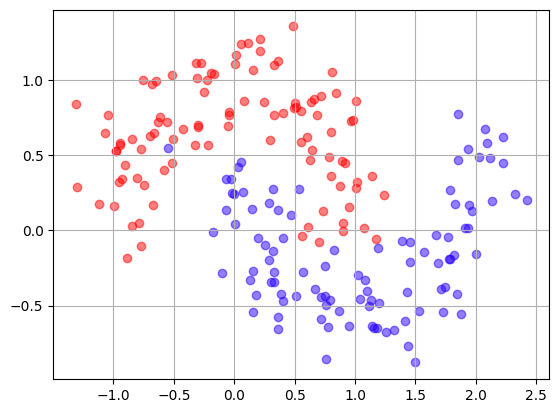

In [ ]:
mlutils.plot_2Ddata(X,y); plt.grid();

observe also how we create an algorithm instance and fit a model

(np.float64(0.48905), np.float64(0.51095))

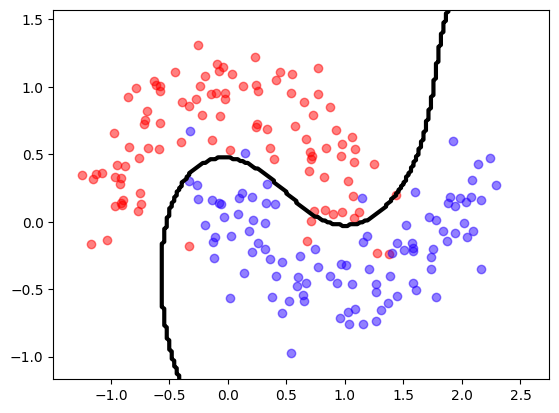

In [ ]:
from sklearn.svm import SVC
estimator = SVC(gamma=1)
estimator.fit(X,y)
mlutils.plot_2Ddata_with_boundary(estimator.predict, X, y)

and how we make predictions

In [ ]:
preds = estimator.predict(X)
print (preds.shape)
preds

(200,)


array([0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0])

in this task you have to complete the following function so that:

- it makes two non-random partitions of `X` and `y`. One containing the first half of the data and one containing the second part. If the number of elements of `X` is odd, then the second half will contain one more element than the first half.
- it fits the model with the first part of the data
- it makes predictions on the second half of the data
- returns the estimator fitted, and the predictions on the second half of the data.

In [ ]:

def fit_and_predict(estimator, X, y):
  assert len(X)==len(y), "X and y must have the same length"
  n = len(X)
  mid = n // 2
  X_train = X[:mid]
  y_train = y[:mid]
  X_test = X[mid:]
  y_test = y[mid:]

  estimator.fit(X_train, y_train)
  predictions = estimator.predict(X_test)
  return estimator, predictions

check your code. your predictions should be similar to

    preds
    >> array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0])

In [ ]:
X = np.array([[ 0.74799424, -0.5867667 ],
       [-0.64457753,  1.25127894],
       [ 0.53682593,  0.10931563],
       [-0.88825294, -0.06987509],
       [ 0.99612638, -0.52295157],
       [ 1.20586692,  0.01930477],
       [-0.19368482,  0.65121567],
       [ 0.1973759 ,  0.82250723],
       [ 0.94859234, -0.5457241 ],
       [ 1.87967948, -0.22740261],
       [ 0.58766146,  0.3982837 ],
       [ 0.27731571,  1.14369568],
       [-0.67421956,  0.12785382],
       [ 0.56957459,  1.05330376],
       [ 1.52435938, -0.29864338],
       [-0.15973608,  0.21790711],
       [ 1.59037406, -0.56875485],
       [ 0.43257507, -0.48900315],
       [ 1.09440413, -0.73789029],
       [-0.32940869,  0.74671384]])
y = np.array([1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0])
X.shape, y.shape

((20, 2), (20,))

In [ ]:
from sklearn.linear_model import LogisticRegression
estimator = LogisticRegression()
estimator, preds = fit_and_predict(estimator, X, y)
preds

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0])

**submit your code**

In [ ]:
student.submit_task(globals(), task_id="task_02");


## Task 3: Select data with indices

Observe how we can create a vector or matrix of `True/False` (boolean) by applying a condition to any matrix or vector

In [ ]:
import numpy as np
y = np.random.randint(10, size=15)
print (y)

[0 2 2 5 3 0 7 2 3 9 0 3 3 6 2]


In [ ]:
y_less_than_5 = y<5
print (y_less_than_5)

[ True  True  True False  True  True False  True  True False  True  True
  True False  True]


and how we can select elements of a vector using a boolean vector of the same length

In [ ]:
y[y_less_than_5]

array([0, 2, 2, 3, 0, 2, 3, 0, 3, 3, 2])

In [ ]:
y[y<5]

array([0, 2, 2, 3, 0, 2, 3, 0, 3, 3, 2])

python doesn't really care how you construct the vector of booleans to index any other vector or array

In [ ]:
v = np.random.randint(20, size=15)
v

array([19, 14,  3,  9, 15,  9,  8,  9, 11, 12,  5,  9,  3, 17,  1])

In [ ]:
v[y<5]

array([19, 14,  3, 15,  9,  9, 11,  5,  9,  3,  1])

in this task you will complete the function `select_per_class` such that:

- receives an array of data `X` and a vector of labels `y`, of the same length
- the labels `y` are binary, they can only have values `0` or `1`
- makes two partitions of `X`, one corresponding to the places where y is 0, and another where y is 1
- returns the two partitions

For instance, for the following X and y

    X = np.array([[8, 8, 5, 2, 0, 0],
                  [4, 4, 8, 1, 3, 7],
                  [4, 5, 3, 6, 9, 6],
                  [0, 3, 5, 3, 5, 3],
                  [0, 7, 2, 7, 1, 7],
                  [5, 7, 7, 1, 8, 5],
                  [2, 5, 7, 3, 8, 0],
                  [7, 2, 5, 9, 8, 7],
                  [1, 6, 6, 1, 6, 0],
                  [0, 7, 6, 5, 3, 4]])

    y = np.array([0, 0, 0, 0, 1, 1, 0, 0, 1, 1])

your function must return the following two matrices:

    [[8 8 5 2 0 0]
     [4 4 8 1 3 7]
     [4 5 3 6 9 6]
     [0 3 5 3 5 3]
     [2 5 7 3 8 0]
     [7 2 5 9 8 7]]
     
    [[0 7 2 7 1 7]
     [5 7 7 1 8 5]
     [1 6 6 1 6 0]
     [0 7 6 5 3 4]]


In [ ]:
def select_per_class(X, y):
    X1 = X[y == 0]
    X2 = X[y == 1]
    return X1, X2

check manually your code

In [ ]:
X = np.array([[3, 0, 4, 2, 0, 0],
              [4, 4, 8, 0, 3, 7],
              [4, 5, 3, 5, 9, 0],
              [3, 3, 5, 3, 5, 3],
              [1, 7, 0, 7, 6, 5]])

y = np.array([1, 1, 0, 0, 1])

In [ ]:
a,b = select_per_class(X, y)
print (a)
print (b)

[[4 5 3 5 9 0]
 [3 3 5 3 5 3]]
[[3 0 4 2 0 0]
 [4 4 8 0 3 7]
 [1 7 0 7 6 5]]


**submit your code**

In [ ]:
student.submit_task(globals(), task_id="task_03");


## Task 4: Measure accuracy

complete the following function such that:

- it receives to binary vectors (composed of 0's and 1's) of the same length
- returns the percentage of elements that are the same in both vectors

recall that

- if `a` and `b` are vectors of the same length a==b   returns a vector of booleans in which positions in True signal that elements in those position are the same
- if `k` is a vector of booleans, `sum(k)` returns the number of `True` elements.


for the following two vectors you should get 0.375

    a = np.array([1,0,0,0,1,1,0,0])
    b = np.array([1,1,1,1,0,1,0,1])
    accuracy(a, b)
    >>> 0.375


In [ ]:
def accuracy(y_true, y_pred):
    result = np.sum(y_true == y_pred) / len(y_true)
    return result


In [ ]:
a = np.array([0,0,0,1,1,1,0,1])
b = np.array([0,1,1,1,0,1,1,1])
accuracy(a,b)

np.float64(0.5)

**submit your code**

In [ ]:
student.submit_task(globals(), task_id="task_04");


## Task 5: Random split, fit and predict

complete the following function so that:

- fits the estimator with a random sample of size `train_pct` of the data `X` and binary labels `y`. You can use the `split_data` function developed previously
- makes predictions on the test part of the data
- measures accuracy of those predictions. you may use the function created previously
- returns the estimator fitted, the test part of `X` and `y`, and the accuracy measured


the execution below should return something with the following structure (the actual numbers will change)


    (LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                        intercept_scaling=1, l1_ratio=None, max_iter=100,
                        multi_class='warn', n_jobs=None, penalty='l2',
                        random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                        warm_start=False), array([[-0.76329684,  0.2572069 ],
            [ 1.02356829,  0.37629873],
            [ 0.32099415,  0.82244488],
            [ 1.08858315, -0.61299904],
            [ 0.58470767,  0.58510559],
            [ 1.60827644, -0.15477173],
            [ 1.53121784,  0.78121504],
            [-0.42734156,  0.87585237],
            [-0.36368682,  0.72152586],
            [ 1.05312619,  0.19835526]]), array([0, 0, 1, 1, 0, 1, 1, 0, 0, 0]), 0.6)

In [ ]:
def split_fit_predict(estimator, X, y, train_pct):
    def split_data(X, y, pct):
        assert len(X)==len(y), "X and y must have the same length"
        assert pct>0 and pct<1, "pct must be in the (0,1) iterval"
        n = len(X)
        permutation = np.random.permutation(n)
        n1_elements = int(n * pct)
        permutation_partition_1 = permutation[:n1_elements]
        permutation_partition_2 = permutation[n1_elements:]
        X1 = X[permutation_partition_1]
        X2 = X[permutation_partition_2]
        y1 = y[permutation_partition_1]
        y2 = y[permutation_partition_2]
        return X1, X2, y1, y2

    def accuracy(y_true, y_pred):
        result = np.sum(y_true == y_pred) / len(y_true)
        return result

    Xtr, Xts, ytr, yts = split_data(X, y, train_pct)
    estimator.fit(Xtr, ytr)
    preds_ts = estimator.predict(Xts)
    return estimator, Xts, yts, accuracy(yts, preds_ts)



In [ ]:
from sklearn.linear_model import LogisticRegression

X, y = make_moons(100, noise=0.2)
estimator = LogisticRegression(solver="lbfgs")
split_fit_predict(estimator, X, y, train_pct=0.9)


(LogisticRegression(),
 array([[ 1.19246505, -0.47870807],
        [ 1.74595711, -0.10496838],
        [ 1.26651484, -0.16646094],
        [ 1.30848472,  0.25891981],
        [ 0.31042728, -0.08451425],
        [ 0.98931422, -0.15691918],
        [ 1.59590762, -0.208201  ],
        [-0.68045384,  0.84520888],
        [ 2.24800713,  0.14510406],
        [ 1.44808889, -0.54244662]]),
 array([0, 1, 1, 0, 1, 1, 1, 0, 1, 1]),
 np.float64(0.8))

**submit your code**

In [ ]:
student.submit_task(globals(), task_id="task_05");
